## Regression with sklearn


Implementing a robust regression analysis using Scikit-Learn after addressing multicollinearity in our features. The following outlines our approach:

1. **Feature Selection**: We took the features that had already been removed during the OLS step. This was crucial for ensuring that our model does not suffer from inflated standard errors and unreliable coefficient estimates.

2. **Model Evaluation Approaches:**
- **Model Training with Train, Validation, and Test Split way**: 
   - We first split the dataset into training, validation, and test sets. This allowed us to train the model on one portion of the data while evaluating its performance on unseen data.
   - The model was fitted using the training set, and we monitored its performance on both the validation and test sets.

- **Cross-Validation**: 
   - To further validate the model's robustness, we performed cross-validation. This technique involved dividing the data into multiple subsets, training the model on some subsets while validating it on others, providing a more comprehensive evaluation of the model's capabilities.
   - We implemented 5-fold cross-validation, which allowed us to assess the model's performance across different data splits, ensuring that our results were not dependent on any single partition of the data.
- **Combining Both Methods:**
  - We combined the normal train-validation-test split with cross-validation to enhance model evaluation. After defining the target variable and combining features into a single DataFrame, we split the data into training, validation, and test sets.
  - We then created a pipeline for scaling and modeling and performed cross-validation on the training set while still maintaining separate validation and test sets.
  - This dual approach allowed us to leverage the strengths of both methods, providing a robust assessment of the model’s generalization capabilities.

Through these steps, we aimed to build a reliable regression model that effectively captures the relationships within the data while maximizing the R² value. The comparison between the normal training-validation-test approach and cross-validation provided insights into the model's generalization capabilities and robustness.

In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression # sklearn

from sklearn.model_selection import train_test_split # sklearn

from sklearn.model_selection import train_test_split, cross_val_score # sklearn
from sklearn.linear_model import LinearRegression, Ridge # sklearn
from sklearn.preprocessing import StandardScaler # sklearn
from sklearn.pipeline import make_pipeline # sklearn

import matplotlib.pyplot as plt #V
import seaborn as sns #V

import numpy as np #SSE, RMSE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error #SSE, RMSE, and MAE

In [2]:
Selected_Features = pd.read_csv(r'C:\Users\norah\Desktop\Najm AI\Selected_Features.csv')
print(Selected_Features)

      MS_SubClass  Lot_Frontage  Lot_Area  Overall_Qual  Overall_Cond  \
0              20           141     31770             6             5   
1              20            80     11622             5             6   
2              20            81     14267             6             6   
3              20            93     11160             7             5   
4              60            74     13830             5             5   
...           ...           ...       ...           ...           ...   
2924           80            37      7937             6             6   
2925           20            69      8885             5             5   
2926           85            62     10441             5             5   
2927           20            77     10010             5             5   
2928           60            74      9627             7             5   

      Year_Built  Year_Remod_Add  BsmtFin_SF_1  Bsmt_Unf_SF  Total_Bsmt_SF  \
0           1960            1960           63

In [3]:
Selected_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   MS_SubClass             2929 non-null   int64
 1   Lot_Frontage            2929 non-null   int64
 2   Lot_Area                2929 non-null   int64
 3   Overall_Qual            2929 non-null   int64
 4   Overall_Cond            2929 non-null   int64
 5   Year_Built              2929 non-null   int64
 6   Year_Remod_Add          2929 non-null   int64
 7   BsmtFin_SF_1            2929 non-null   int64
 8   Bsmt_Unf_SF             2929 non-null   int64
 9   Total_Bsmt_SF           2929 non-null   int64
 10  First_Flr_SF            2929 non-null   int64
 11  Gr_Liv_Area             2929 non-null   int64
 12  Full_Bath               2929 non-null   int64
 13  Half_Bath               2929 non-null   int64
 14  Bedroom_AbvGr           2929 non-null   int64
 15  Kitchen_AbvGr        

# Trine Validation and Test 

Data Splitting
To evaluate the model's performance, the data will split as follows:

Training Set: 60% of the data
Validation Set: 20% of the data
Test Set: 20% of the data

In [4]:
# Prepare the feature set
X = Selected_Features.drop('SalePrice', axis=1)

# Define the target variable
y = Selected_Features['SalePrice']

# Hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit the initial model with the selected features
# Numformula = 'SalePrice ~ ' + ' + '.join(Selected_Features_except_SalePrice)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [6]:
lm = LinearRegression()

In [7]:
# #validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression val R^2: 0.898


In [8]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.821


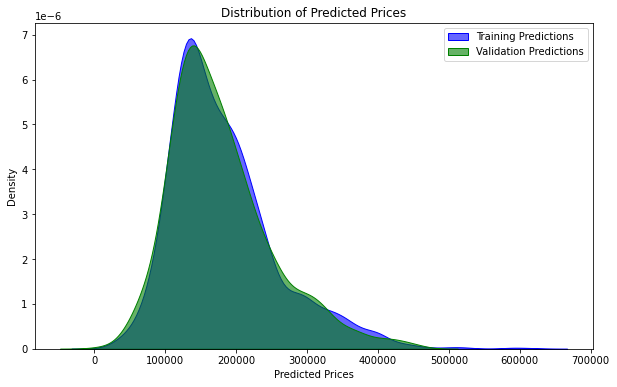

In [9]:
# Make predictions for training and validation sets
y_train_pred = lm.predict(X_train)
y_val_pred = lm.predict(X_val)

# Visualize the distribution of predicted prices
plt.figure(figsize=(10, 6))

# Distribution of training predictions
sns.kdeplot(y_train_pred, label='Training Predictions', color='blue', fill=True, alpha=0.6)

# Distribution of validation predictions
sns.kdeplot(y_val_pred, label='Validation Predictions', color='green', fill=True, alpha=0.6)

plt.title('Distribution of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

# Using Cross-Validation

In [10]:
X2 = Selected_Features.drop('SalePrice', axis=1)

y2 = Selected_Features['SalePrice']  # Define the target variable

# Create a pipeline for scaling and modeling
pipeline = make_pipeline(LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X2, y2, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R^2: {cv_scores.mean():.3f}')

Selected_Features

Cross-Validation R^2 Scores: [0.88834923 0.90915489 0.81680962 0.80199143 0.90487752]
Mean Cross-Validation R^2: 0.864


,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,BsmtFin_SF_1,Bsmt_Unf_SF,Total_Bsmt_SF,...,Bsmt_Qual_TA,Bsmt_Exposure_Gd,Bsmt_Exposure_No,BsmtFin_Type_1_GLQ,Kitchen_Qual_TA,Functional_Typ,Garage_Finish_RFn,Sale_Type_New,Sale_Type_WD_,SalePrice
0,20,141,31770,6,5,1960,1960,639,441,1080,...,1,1,0,0,1,1,0,0,1,215000
1,20,80,11622,5,6,1961,1961,468,270,882,...,1,0,1,0,1,1,0,0,1,105000
2,20,81,14267,6,6,1958,1958,923,406,1329,...,1,0,1,0,0,1,0,0,1,172000
3,20,93,11160,7,5,1968,1968,1065,1045,2110,...,1,0,1,0,0,1,0,0,1,244000
4,60,74,13830,5,5,1997,1998,791,137,928,...,0,0,1,1,1,1,0,0,1,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,80,37,7937,6,6,1984,1984,819,184,1003,...,1,0,0,1,1,1,0,0,1,142500
2925,20,69,8885,5,5,1983,1983,301,239,864,...,0,0,0,0,1,1,0,0,1,131000
2926,85,62,10441,5,5,1992,1992,337,575,912,...,0,0,0,1,1,1,0,0,1,132000
2927,20,77,10010,5,5,1974,1975,1071,195,1389,...,0,0,0,0,1,1,1,0,1,170000


<Figure size 720x432 with 0 Axes>

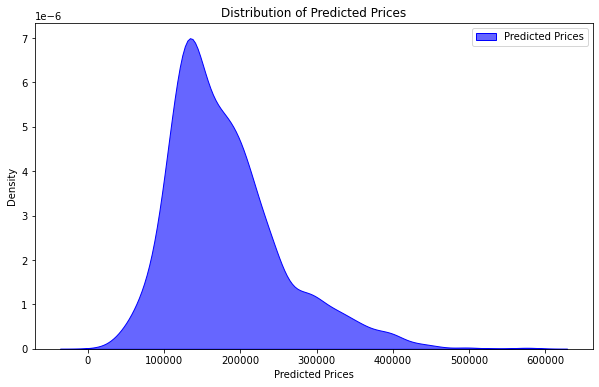

In [11]:
# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions (if desired for visualization)
y_pred = pipeline.predict(X2)

# Visualize the distribution of predicted prices
plt.figure(figsize=(10, 6))

# Visualize the distribution of predicted prices
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Predicted Prices', color='blue', fill=True, alpha=0.6)

plt.title('Distribution of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

# Cross-Validation by spliting the data into training, validation, and test sets

In [12]:
X3 = Selected_Features.drop('SalePrice', axis=1)

y3 = Selected_Features['SalePrice']  # Define the target variable

# Split the data into training, validation, and test sets
X_temp3, X_test3, y_temp3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_temp3, y_temp3, test_size=0.25, random_state=42)  # 0.25 of 0.8 is 0.2

# Create a pipeline for scaling and modeling
pipeline3 = make_pipeline(LinearRegression())

# Perform cross-validation on the training set
cv_scores3 = cross_val_score(pipeline3, X_train3, y_train3, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation R^2 Scores: {cv_scores3}')
print(f'Mean Cross-Validation R^2: {cv_scores3.mean():.3f}')


Cross-Validation R^2 Scores: [0.90158001 0.90465225 0.84138663 0.88988873 0.89011849]
Mean Cross-Validation R^2: 0.886


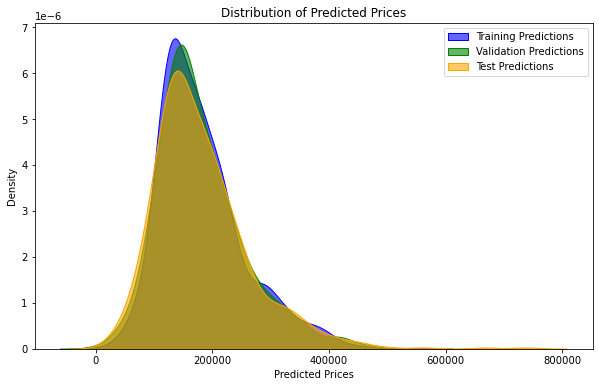

In [13]:

# Fit the model on the training set
pipeline3.fit(X_train3, y_train3)

# Make predictions for training, validation, and test sets
y_train_pred3 = pipeline3.predict(X_train3)
y_val_pred3 = pipeline3.predict(X_val3)
y_test_pred3 = pipeline3.predict(X_test3)

# Visualize the distribution of predicted prices
plt.figure(figsize=(10, 6))

# Distribution of training predictions
sns.kdeplot(y_train_pred3, label='Training Predictions', color='blue', fill=True, alpha=0.6)

# Distribution of validation predictions
sns.kdeplot(y_val_pred3, label='Validation Predictions', color='green', fill=True, alpha=0.6)

# Distribution of test predictions
sns.kdeplot(y_test_pred3, label='Test Predictions', color='orange', fill=True, alpha=0.6)

plt.title('Distribution of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

### Comparison of Results:

|  Metric  | Validation Set | Test Set |  Cross-Validation Mean |
|----------|----------------|----------|------------------------|
| **Normal Split**         | Validation R²: 0.898 | Test R²: 0.821 | -                      |
| **Cross-Validation**     | -                  | -        | Mean R²: 0.864        |
| **Normal Split + Cross-Validation** | - | -        | Mean R²: 0.886        |

### Summary of Results:
1. **Normal Split**:
   - **Validation Set**: The model achieved an R² score of **0.898**, indicating that it explains approximately **89.8%** of the variance in house prices on the validation set.
   - **Test Set**: The performance on the test set was slightly lower with an R² score of **0.821**, suggesting good generalization but with some variance when applied to unseen data.

2. **Cross-Validation**:
   - The model's R² scores from 5-fold cross-validation were:
     - **0.888**
     - **0.909**
     - **0.817**
     - **0.802**
     - **0.905**
   - The mean R² score from cross-validation was **0.864**, indicating consistent performance across different subsets of the training data.

3. **Normal Split followed by Cross-Validation**:
   - The individual cross-validation scores were:
     - **0.901**
     - **0.904**
     - **0.841**
     - **0.889**
     - **0.890**
   - The mean R² score for this method was **0.886**, reinforcing the model's predictive ability with a slight improvement compared to the standard cross-validation alone.

## SSE, RMSE & MAE for Croee-Validation

In [14]:
# Calculate SSE
sse = np.sum((y2 - y_pred) ** 2)
print(f'Sum of Squared Errors (SSE): {sse:.2f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y2, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y2, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate the mean of the three metrics
mean_metrics = np.mean([sse, rmse, mae])
print(f'Mean of SSE, RMSE, and MAE: {mean_metrics:.2f}')

Sum of Squared Errors (SSE): 2290949885641.46
Root Mean Squared Error (RMSE): 27967.14
Mean Absolute Error (MAE): 17292.71
Mean of SSE, RMSE, and MAE: 763649976967.10


## SSE, RMSE & MAE for Cross-Validation by spliting

In [15]:
# Calculate SSE, RMSE, and MAE for the test set predictions
sse = np.sum((y_test3 - y_test_pred3) ** 2)
print(f'Sum of Squared Errors (SSE): {sse:.2f}')

rmse = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

mae = mean_absolute_error(y_test3, y_test_pred3)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate the mean of the three metrics
mean_metrics = np.mean([sse, rmse, mae])
print(f'Mean of SSE, RMSE, and MAE: {mean_metrics:.2f}')

Sum of Squared Errors (SSE): 940176033606.29
Root Mean Squared Error (RMSE): 40054.91
Mean Absolute Error (MAE): 17946.23
Mean of SSE, RMSE, and MAE: 313392030535.81
